In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter,find_peaks
import pandas as pd
from matplotlib import font_manager
my_font=font_manager.FontProperties(fname='C:\Windows\Fonts\simhei.ttf')

# 导入一系列包 

In [2]:
data = pd.read_csv('D:\zy.txt',sep=' ',names=['wavenumber','T'],header=0,)
data

,wavenumber,T
0,4398.83301,100.04776
1,4396.90479,100.02437
2,4394.97607,100.00000
3,4393.04785,99.94889
4,4391.11914,99.90333
...,...,...
2068,410.76343,78.15790
2069,408.83496,77.20425
2070,406.90649,76.37591
2071,404.97803,75.89079


In [3]:
# 平滑处理
smooth_data = savgol_filter(data['T'], window_length=55, polyorder=3)

# 基线校正
baseline = np.percentile(smooth_data, 1)
corrected_data = smooth_data - baseline

# 寻峰
peaks, _ = find_peaks(-corrected_data, height=-40, distance=50)
peaks

array([ 728,  811,  901,  962, 1407, 1457, 1543, 1609, 1665, 1738, 1803,
       1864, 1924, 2008], dtype=int64)

## 拿到红外的数据，指定表头，并展示


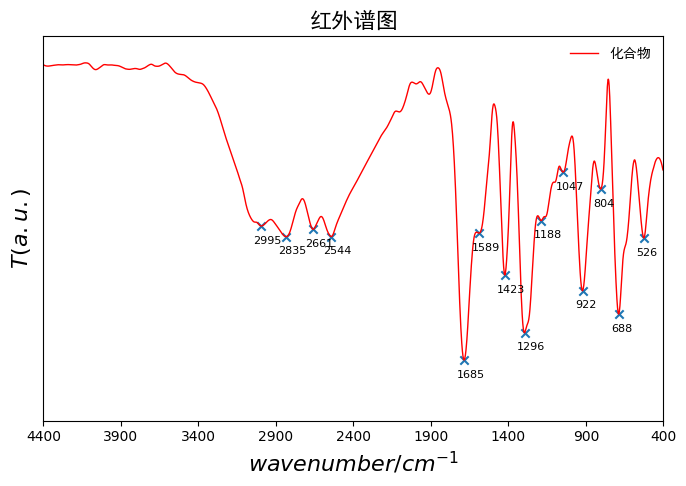

In [4]:
x = data['wavenumber']

ax = plt.figure('红外谱图',figsize=(8,5))
plt.plot(x,corrected_data,c='r',lw=1,label='化合物')
plt.scatter(x[peaks], corrected_data[peaks], marker="x", )
for i in peaks:
    plt.annotate(f"{x[i]:.0f}", xy=(x[i], corrected_data[i]), xytext=(x[i]+50, corrected_data[i]-4),ha = 'left',fontsize =8)


plt.title('红外谱图',fontproperties=my_font,fontsize=16)
plt.xticks(np.arange(400,4401,500))
plt.yticks([])
plt.xlim(4400,400)
plt.ylim(-20,68)
plt.xlabel('$wavenumber/cm^{-1}$',fontsize=16)
plt.ylabel('$T(a.u.)$',fontsize=16)
plt.legend(prop=my_font,frameon=False)

